omniglot dataset shape : (1622, 20, 28, 28, 1)
(20, 28, 28, 1)
(1, 28, 28)


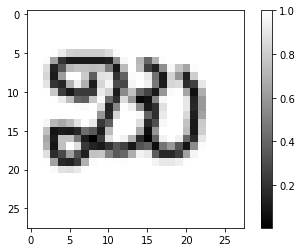

(1, 28, 28)


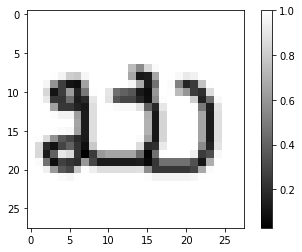

(1, 28, 28)


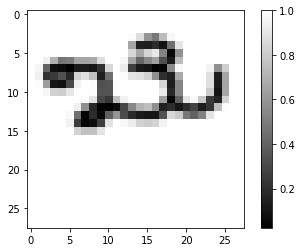

(1, 28, 28)


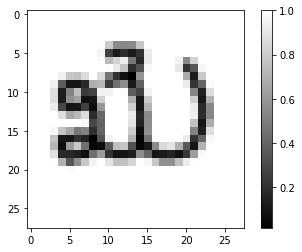

(1, 28, 28)


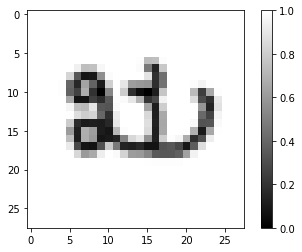

(1, 28, 28)


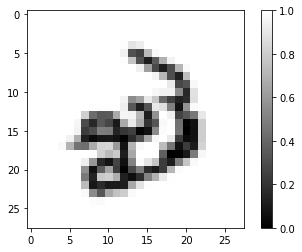

(1, 28, 28)


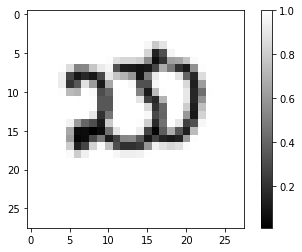

(1, 28, 28)


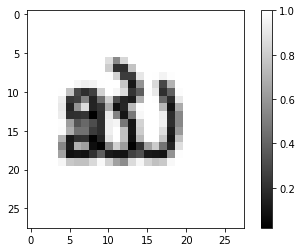

(1, 28, 28)


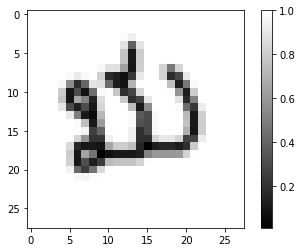

(1, 28, 28)


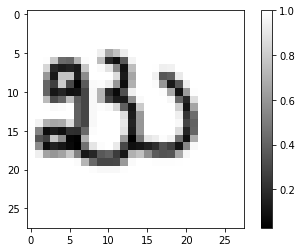

(1, 28, 28)


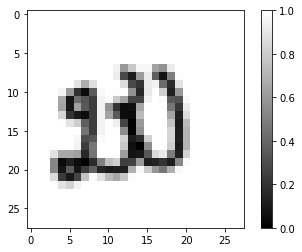

(1, 28, 28)


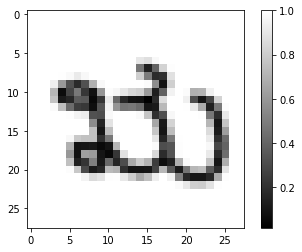

(1, 28, 28)


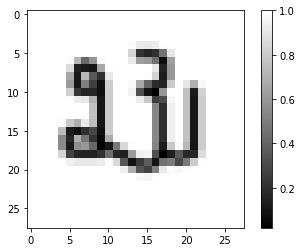

(1, 28, 28)


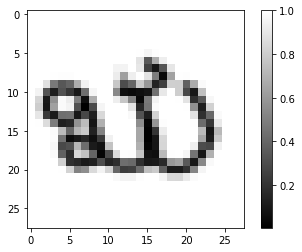

(1, 28, 28)


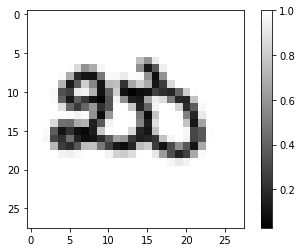

(1, 28, 28)


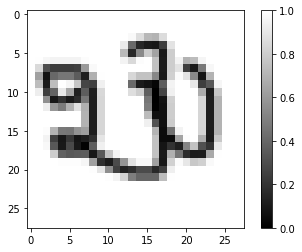

(1, 28, 28)


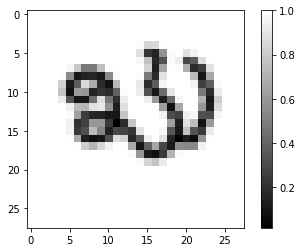

(1, 28, 28)


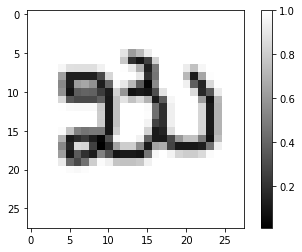

(1, 28, 28)


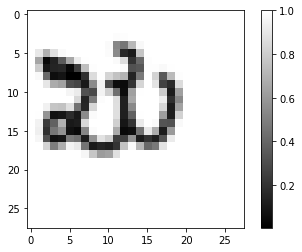

(1, 28, 28)


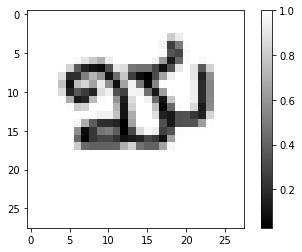

In [9]:
import os, numpy as np, matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# check dataset 
# 예시로 omniglot data 를 받아서 어떠한 형태로 학습시켜야 하는지 확인해 볼 수 있다.
data_folder = './datasets/omniglot_data.npy'

with open(data_folder, 'rb') as f:
    omni_data = np.load(f)
    
    print('omniglot dataset shape :', omni_data.shape)
    # (총 image 종류 수 / 한 종류에 있는 이미지 수 / 영상 가로 / 영상 세로 / 차원(RGB = 3, gray = 1))
    
    for images in omni_data:
        
        print(images.shape)
        
        for img in images:
            
            img = np.transpose(img, (2, 0, 1))
            print(img.shape)
            
            plt.imshow(img[0], cmap='gray')
            plt.colorbar()
            plt.show(); plt.close()

        break

## Preprocessing

- Procedure

    1. Gray scale 로 조정
    2. image resizing (512, 512) ???
    3. Gaussian blur
    4. Rescaling images using Min-max scaler or zscore normalization


- Reference
    1. https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy

(1736, 2416, 3)  -->  (512, 512)


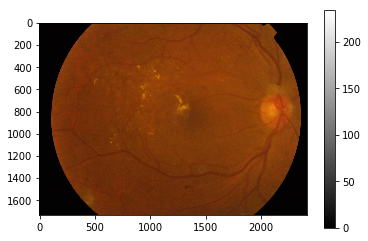

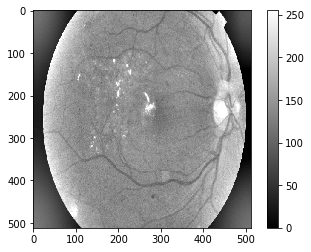

In [23]:
# image save --> npy file

import imageio
import cv2
from sklearn.preprocessing import MinMaxScaler

root_dir = '../../../Data/APTOS_2019/train_images'

def Preprocess(img_arr, target_shape = 512):
    
    # to gray scale
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)

    # resizing
    img_arr = cv2.resize(img_arr, (target_shape, target_shape))
    
    # [1]
    img_arr=cv2.addWeighted ( img_arr, 4, cv2.GaussianBlur( img_arr , (0,0) , target_shape/10) ,-4 ,128) # the trick is to add this line

    # min-max scaler
#     scaler = MinMaxScaler() ==> 오류가 난다..!
#     img_arr = scaler.fit_transform(img_arr)
    
    return img_arr

for image in os.listdir(root_dir):
    
    img_file = os.path.join(root_dir, image)
    img_arr = imageio.imread(img_file)

    # TODO : image preprocessing function
    img_preprocessed = Preprocess(img_arr)
    
    print(img_arr.shape,' --> ', img_preprocessed.shape)
    
    plt.imshow(img_arr, cmap='gray')
    plt.colorbar()
    plt.show(); plt.close()
    
    plt.imshow(img_preprocessed, cmap='gray')
    plt.colorbar()
    plt.show(); plt.close()
    break